<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Daten-einlesen-und-Daten-verstehen" data-toc-modified-id="MNIST-Daten-einlesen-und-Daten-verstehen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Daten einlesen und Daten verstehen</a></span></li><li><span><a href="#Mal-beispielhaft-ein-Trainingsbild-anzeigen" data-toc-modified-id="Mal-beispielhaft-ein-Trainingsbild-anzeigen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mal beispielhaft ein Trainingsbild anzeigen</a></span></li><li><span><a href="#Perzeptrongewichtsmatrix-erstellen" data-toc-modified-id="Perzeptrongewichtsmatrix-erstellen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perzeptrongewichtsmatrix erstellen</a></span></li><li><span><a href="#Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix" data-toc-modified-id="Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aktivierungen berechnen: Input mal Gewichtsmatrix</a></span></li><li><span><a href="#Outputs-berechnen" data-toc-modified-id="Outputs-berechnen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outputs berechnen</a></span></li><li><span><a href="#Fehler-berechnen" data-toc-modified-id="Fehler-berechnen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fehler berechnen</a></span></li><li><span><a href="#Gewichtsaktualisierungen-berechnen" data-toc-modified-id="Gewichtsaktualisierungen-berechnen-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gewichtsaktualisierungen berechnen</a></span></li><li><span><a href="#Testen-des-Perzeptrons" data-toc-modified-id="Testen-des-Perzeptrons-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testen des Perzeptrons</a></span></li><li><span><a href="#Perzeptron-Training" data-toc-modified-id="Perzeptron-Training-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perzeptron Training</a></span></li></ul></div>

# MNIST Daten einlesen und Daten verstehen

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# download and read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.num_examples

55000

In [4]:
mnist.test.num_examples

10000

In [5]:
mnist.validation.num_examples

5000

In [6]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(55000, 784)

In [9]:
28*28

784

In [10]:
y_train.shape

(55000, 10)

In [11]:
y_train

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000, 10)

# Mal beispielhaft ein Trainingsbild anzeigen

In [14]:
from random import randint
rnd_img_nr = randint(0,y_train.shape[0]-1)

In [15]:
rnd_img_nr

6351

In [16]:
row_vec = x_train[rnd_img_nr, :]

In [17]:
row_vec.shape

(784,)

In [18]:
M = row_vec.reshape(28, 28)

In [19]:
M.shape

(28, 28)

In [20]:
from matplotlib import pyplot as plt

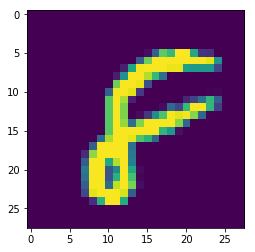

In [21]:
plt.imshow(M)
plt.show()

In [22]:
one_hot_vec = y_train[rnd_img_nr, :]

In [23]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [24]:
import numpy as np
np.argmax(one_hot_vec)

8

# Perzeptrongewichtsmatrix erstellen

In [25]:
nr_inputs = 28*28 + 1
nr_outputs = 10

In [26]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [27]:
W

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [28]:
W.shape

(785, 10)

In [86]:
low = -1.0
high = +1.0
W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )

In [87]:
W

array([[-0.44969329,  0.24170185, -0.32200923, ..., -0.26769793,
         0.05986487,  0.79543351],
       [-0.57988718,  0.69861279, -0.77348195, ..., -0.13743152,
         0.02412455, -0.17318687],
       [-0.287574  , -0.81854757,  0.34782214, ...,  0.40982996,
         0.67013333,  0.26569576],
       ..., 
       [-0.57259345,  0.01458782, -0.58437633, ...,  0.09157694,
         0.77024055, -0.17416339],
       [ 0.53967539,  0.42242605,  0.12032197, ...,  0.92141356,
        -0.60243199,  0.46553946],
       [-0.17980184, -0.42737523,  0.06501633, ...,  0.67519715,
        -0.73110324, -0.73812979]])

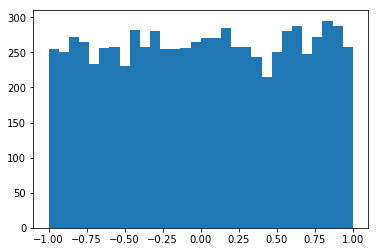

In [80]:
plt.hist(W.reshape(-1), bins=30)
plt.show()

In [81]:
def create_new_perceptron():
    low = -1.0
    high = +1.0
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W

W = create_new_perceptron()

# Aktivierungen berechnen: Input mal Gewichtsmatrix

In [34]:
row_vec.shape

(784,)

In [35]:
type(row_vec)

numpy.ndarray

In [36]:
x = np.append(row_vec,[1])

In [37]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [38]:
x.shape

(785,)

In [39]:
x.ndim

1

In [40]:
W.shape

(785, 10)

In [41]:
W.ndim

2

In [42]:
# Das folgende ist nicht was wir wollen!
# act = x * W 

In [88]:
act = np.matmul(x, W)

In [89]:
act.shape

(10,)

In [90]:
act = act.reshape(-1)

In [91]:
act

array([-9.66880237, -1.60605683, -5.31247448, -7.63706822,  0.17627689,
       -5.45803273,  3.04532282,  5.08460543, -9.43423333, -4.35623788])

# Outputs berechnen

In [98]:
# Identity
def f(x):
    return x

In [93]:
# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x

In [94]:
f = np.vectorize(f, otypes=[float])

In [95]:
y = f(act)

In [96]:
y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.17627689,
        0.        ,  3.04532282,  5.08460543,  0.        ,  0.        ])

Alternative zur Outputberechung über `list comprehension`:

In [50]:
y = [f(x) for x in act]

In [51]:
y = np.array(y)

In [52]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

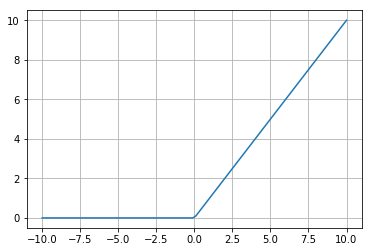

In [97]:
x_values = np.linspace(-10.0,10.0,100)
y_values = [f(x) for x in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

# Fehler berechnen

In [108]:
y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.17627689,
        0.        ,  3.04532282,  5.08460543,  0.        ,  0.        ])

In [109]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [110]:
error = one_hot_vec - y

In [111]:
error

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.17627689,
        0.        , -2.04532282, -5.08460543,  0.        ,  0.        ])

In [112]:
alpha = 0.01
alpha * error

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00176277,
        0.        , -0.02045323, -0.05084605,  0.        ,  0.        ])

# Gewichtsaktualisierungen berechnen

Skalare Gewichtsänderungsberechnung:

In [103]:
for j in range(0, nr_outputs):
    for i in range(0,nr_inputs):
        delta_w = alpha * error[j] * x[i]
        print(delta_w)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-0.00108531262993
-0.00118209209074
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00110605108582
-1.38256389011e-05
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-2.07384591724e-05
-0.0011475279976
-0.00174894332345
-0.00174894332345
-0.00167290231852
-0.000338728165389
-0.000117517929838
-0.000338728165389
-0.00109222544856
-0.00145169212237
-0.00175585614208
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00174894332345
-7.60410114933e-05
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-6.91281928636e-05
-0.00156921003907
-0.00174894332345
-0.00174894332345
-0.00143095366648
-0.000103692292579
-0.00118900490937
-0.00174894332345
-0.00174894332345
-0.00174894332345
-0.00175585614208
-0.00170746641167
-0.0013894767547
-0.00174894332345
-0.00145169212237
-0.00145169212237
-0.00174894332345
-0.00174894332345
-0.00120974336526
-2.76512778021e-05
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0508460543092
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

Vektorielle Gewichtsänderungsberechnung:

In [113]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x

In [114]:
# Zeige letzten Gewichtsänderungsvektor
print(delta_w_vector.shape)
print(delta_w_vector)

(785,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

Durchführung der Gewichtsänderung:

In [115]:
W.shape

(785, 10)

In [116]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x    
    W[:,j] =  W[:,j] + delta_w_vector

In [117]:
W.shape

(785, 10)

# Testen des Perzeptrons

In [118]:
W.shape

(785, 10)

In [119]:
nr_test_images = x_test.shape[0]

In [120]:
nr_test_images

10000

In [121]:
correct = 0

for test_img_nr in range(0,nr_test_images):
    row_vec = x_test[test_img_nr, :]
    one_hot_vec = y_test[test_img_nr, :]
    gt_label = np.argmax( one_hot_vec )
    #print(gt_label)
    
    x = np.append(row_vec,[1])
    
    # Aktivierungen der 10 Outputneurone berechnen
    act = np.matmul(x, W)
    
    # Outputs aller 10 Outputneurone berechnen
    out = f(act)
    
    # Was wurde prädiziert?
    is_label = np.argmax( out )
    
    #print(gt_label, is_label)
    
    if is_label == gt_label:
        correct += 1
        
print("Correct: ", correct)

Correct:  1063


In [122]:
def test_perceptron(W):
    
    correct = 0
    for test_img_nr in range(0,nr_test_images):
        row_vec = x_test[test_img_nr, :]
        one_hot_vec = y_test[test_img_nr, :]
        gt_label = np.argmax( one_hot_vec )
        #print(gt_label)

        x = np.append(row_vec,[1])

        # Aktivierungen der 10 Outputneurone berechnen
        act = np.matmul(x, W)

        # Outputs aller 10 Outputneurone berechnen
        out = f(act)

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)

        if is_label == gt_label:
            correct += 1     
            
    print("Correct: ", correct)

In [123]:
test_perceptron(W)

Correct:  1063


# Perzeptron Training

In [124]:
def train_perceptron(W, nr_train_steps, alpha):
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Feed Forward
        row_vec = x_train[rnd_img_nr, :]
        one_hot_vec = y_train[rnd_img_nr, :]
        x = np.append(row_vec,[1])
        act = np.matmul(x, W)
        out = f(act)
        
        # Fehlerberechnung
        error = one_hot_vec - y
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            test_perceptron(W)

In [125]:
W = create_new_perceptron()

In [126]:
test_perceptron(W)

Correct:  730


In [132]:
alpha = 0.1
train_perceptron(W, 3000, alpha)


Train step:  0
Correct:  5001

Train step:  100
Correct:  5030

Train step:  200
Correct:  5043

Train step:  300
Correct:  5068

Train step:  400
Correct:  5033

Train step:  500
Correct:  5018

Train step:  600
Correct:  5027

Train step:  700
Correct:  5043

Train step:  800
Correct:  5082

Train step:  900
Correct:  5095

Train step:  1000
Correct:  5110

Train step:  1100
Correct:  5095

Train step:  1200
Correct:  5097

Train step:  1300
Correct:  5063

Train step:  1400
Correct:  5048

Train step:  1500
Correct:  5042

Train step:  1600
Correct:  5052

Train step:  1700
Correct:  5040

Train step:  1800
Correct:  5041

Train step:  1900
Correct:  5057

Train step:  2000
Correct:  5048

Train step:  2100
Correct:  5062

Train step:  2200
Correct:  5076

Train step:  2300
Correct:  5073

Train step:  2400
Correct:  5078

Train step:  2500
Correct:  5086

Train step:  2600
Correct:  5075

Train step:  2700
Correct:  5074

Train step:  2800
Correct:  5088

Train step:  2900
Correct